In [20]:
import pandas as pd
from pycaret.classification import *
from tqdm import tqdm

# 특정 조건의 데이터만 사용하기
* person_rn 사용자번호의 unique() 값이 10이상인 데이터만 훈련
* 즉, 한 사람의 사용 컨텐츠가 10개이상인 사람만 데이터로 사용하기

In [ ]:
# 제출 점수 : 0.6135285036(2021-12-14 16:43:27)

# 데이터 불러오기

In [21]:
train = pd.read_csv('../data/train.csv')
test = pd.read_csv('../data/test.csv')

# 데이터 확인

In [32]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 501951 entries, 0 to 501950
Data columns (total 33 columns):
 #   Column                  Non-Null Count   Dtype
---  ------                  --------------   -----
 0   d_l_match_yn            501951 non-null  bool 
 1   d_m_match_yn            501951 non-null  bool 
 2   d_s_match_yn            501951 non-null  bool 
 3   h_l_match_yn            501951 non-null  bool 
 4   h_m_match_yn            501951 non-null  bool 
 5   h_s_match_yn            501951 non-null  bool 
 6   person_attribute_a      501951 non-null  int64
 7   person_attribute_a_1    501951 non-null  int64
 8   person_attribute_b      501951 non-null  int64
 9   person_prefer_c         501951 non-null  int64
 10  person_prefer_d_1       501951 non-null  int64
 11  person_prefer_d_2       501951 non-null  int64
 12  person_prefer_d_3       501951 non-null  int64
 13  person_prefer_e         501951 non-null  int64
 14  person_prefer_f         501951 non-null  int64
 15  

In [22]:
train.head()

,id,d_l_match_yn,d_m_match_yn,d_s_match_yn,h_l_match_yn,h_m_match_yn,h_s_match_yn,person_attribute_a,person_attribute_a_1,person_attribute_b,person_prefer_c,person_prefer_d_1,person_prefer_d_2,person_prefer_d_3,person_prefer_e,person_prefer_f,person_prefer_g,person_prefer_h_1,person_prefer_h_2,person_prefer_h_3,contents_attribute_i,contents_attribute_a,contents_attribute_j_1,contents_attribute_j,contents_attribute_c,contents_attribute_k,contents_attribute_l,contents_attribute_d,contents_attribute_m,contents_attribute_e,contents_attribute_h,person_rn,contents_rn,contents_open_dt,target
0,0,True,True,True,False,False,False,1,4,3,5,275,370,369,8,1,1,4,95,59,3,3,10,2,1,2,1608,275,1,4,139,618822,354805,2020-01-17 12:09:36,1
1,1,False,False,False,True,True,False,1,3,4,1,114,181,175,4,1,1,131,101,96,1,3,5,1,1,2,1608,275,1,4,133,571659,346213,2020-06-18 17:48:52,0
2,2,False,False,False,True,False,False,2,0,3,5,464,175,452,3,1,1,54,263,56,3,1,10,2,1,1,1600,94,1,4,53,399816,206408,2020-07-08 20:00:10,0
3,3,False,False,False,True,False,False,2,0,2,5,703,705,704,3,1,1,72,227,2,1,3,5,1,1,2,1608,275,5,3,74,827967,572323,2020-01-13 18:09:34,0
4,4,True,True,True,False,False,False,1,3,4,5,275,370,369,4,1,1,214,210,209,1,1,10,2,1,2,1608,275,1,4,74,831614,573899,2020-03-09 20:39:22,0


In [33]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46404 entries, 0 to 46403
Data columns (total 32 columns):
 #   Column                  Non-Null Count  Dtype
---  ------                  --------------  -----
 0   d_l_match_yn            46404 non-null  bool 
 1   d_m_match_yn            46404 non-null  bool 
 2   d_s_match_yn            46404 non-null  bool 
 3   h_l_match_yn            46404 non-null  bool 
 4   h_m_match_yn            46404 non-null  bool 
 5   h_s_match_yn            46404 non-null  bool 
 6   person_attribute_a      46404 non-null  int64
 7   person_attribute_a_1    46404 non-null  int64
 8   person_attribute_b      46404 non-null  int64
 9   person_prefer_c         46404 non-null  int64
 10  person_prefer_d_1       46404 non-null  int64
 11  person_prefer_d_2       46404 non-null  int64
 12  person_prefer_d_3       46404 non-null  int64
 13  person_prefer_e         46404 non-null  int64
 14  person_prefer_f         46404 non-null  int64
 15  person_prefer_g    

In [23]:
test.head()

,id,d_l_match_yn,d_m_match_yn,d_s_match_yn,h_l_match_yn,h_m_match_yn,h_s_match_yn,person_attribute_a,person_attribute_a_1,person_attribute_b,person_prefer_c,person_prefer_d_1,person_prefer_d_2,person_prefer_d_3,person_prefer_e,person_prefer_f,person_prefer_g,person_prefer_h_1,person_prefer_h_2,person_prefer_h_3,contents_attribute_i,contents_attribute_a,contents_attribute_j_1,contents_attribute_j,contents_attribute_c,contents_attribute_k,contents_attribute_l,contents_attribute_d,contents_attribute_m,contents_attribute_e,contents_attribute_h,person_rn,contents_rn,contents_open_dt
0,0,True,False,False,True,True,True,1,1,2,1,857,851,1227,4,1,1,263,56,49,1,3,10,2,1,2,1147,839,1,5,263,393790,236865,2020-12-01 02:24:18
1,1,False,False,False,True,False,False,2,0,2,2,683,1086,662,2,1,1,258,263,49,1,3,5,1,1,2,1611,278,1,4,263,394058,236572,2020-12-17 05:42:53
2,2,True,False,False,True,True,True,2,3,2,1,514,790,1233,0,1,1,177,170,171,3,3,3,1,1,2,1817,490,3,4,177,1002061,704612,2020-12-10 23:33:41
3,3,True,False,False,True,True,True,1,2,2,5,114,181,175,4,1,1,177,170,171,3,3,5,1,1,2,101,150,5,3,177,1000813,704652,2020-12-03 19:44:55
4,4,True,False,False,True,False,False,1,6,4,5,1082,1078,1056,5,1,1,178,177,4,3,1,5,1,1,1,985,1097,1,4,177,111146,704413,2020-12-11 21:24:34


# 필요 데이터 추출

모델 학습시 id, contents_open_dt 제거하고 진행

In [24]:
train = train.drop(['id', 'contents_open_dt'], axis=1) 
test = test.drop(['id', 'contents_open_dt'], axis=1)

In [25]:
train.head()

,d_l_match_yn,d_m_match_yn,d_s_match_yn,h_l_match_yn,h_m_match_yn,h_s_match_yn,person_attribute_a,person_attribute_a_1,person_attribute_b,person_prefer_c,person_prefer_d_1,person_prefer_d_2,person_prefer_d_3,person_prefer_e,person_prefer_f,person_prefer_g,person_prefer_h_1,person_prefer_h_2,person_prefer_h_3,contents_attribute_i,contents_attribute_a,contents_attribute_j_1,contents_attribute_j,contents_attribute_c,contents_attribute_k,contents_attribute_l,contents_attribute_d,contents_attribute_m,contents_attribute_e,contents_attribute_h,person_rn,contents_rn,target
0,True,True,True,False,False,False,1,4,3,5,275,370,369,8,1,1,4,95,59,3,3,10,2,1,2,1608,275,1,4,139,618822,354805,1
1,False,False,False,True,True,False,1,3,4,1,114,181,175,4,1,1,131,101,96,1,3,5,1,1,2,1608,275,1,4,133,571659,346213,0
2,False,False,False,True,False,False,2,0,3,5,464,175,452,3,1,1,54,263,56,3,1,10,2,1,1,1600,94,1,4,53,399816,206408,0
3,False,False,False,True,False,False,2,0,2,5,703,705,704,3,1,1,72,227,2,1,3,5,1,1,2,1608,275,5,3,74,827967,572323,0
4,True,True,True,False,False,False,1,3,4,5,275,370,369,4,1,1,214,210,209,1,1,10,2,1,2,1608,275,1,4,74,831614,573899,0


## 한 사람의 사용 컨텐츠 수가 10개 이상인 데이터 추출

### train set

In [26]:
train_person_rn = train.person_rn.value_counts()
train_person_rn = train_person_rn.reset_index()
train_person_rn_above_10 = train_person_rn[train_person_rn['person_rn'] > 9]
train_person_rn_above_10.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 656 entries, 0 to 655
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   index      656 non-null    int64
 1   person_rn  656 non-null    int64
dtypes: int64(2)
memory usage: 15.4 KB


In [27]:
train_above_10 = pd.DataFrame()
for index in tqdm(train_person_rn_above_10['index'].unique()):
    tmp = train[train['person_rn']==index]
    train_above_10 = pd.concat([train_above_10, tmp], ignore_index=True)

100%|██████████| 656/656 [00:01<00:00, 400.09it/s]


In [28]:
train_above_10.head()

,d_l_match_yn,d_m_match_yn,d_s_match_yn,h_l_match_yn,h_m_match_yn,h_s_match_yn,person_attribute_a,person_attribute_a_1,person_attribute_b,person_prefer_c,person_prefer_d_1,person_prefer_d_2,person_prefer_d_3,person_prefer_e,person_prefer_f,person_prefer_g,person_prefer_h_1,person_prefer_h_2,person_prefer_h_3,contents_attribute_i,contents_attribute_a,contents_attribute_j_1,contents_attribute_j,contents_attribute_c,contents_attribute_k,contents_attribute_l,contents_attribute_d,contents_attribute_m,contents_attribute_e,contents_attribute_h,person_rn,contents_rn,target
0,False,False,False,True,False,False,1,6,2,5,372,978,966,7,1,1,95,4,59,3,3,5,1,1,2,1151,756,5,4,108,627445,414363,1
1,False,False,False,True,False,False,1,6,2,5,372,978,966,7,1,1,95,4,59,3,2,5,1,3,2,361,978,2,5,139,627445,357354,0
2,False,False,False,True,False,False,1,6,2,5,372,978,966,7,1,1,95,4,59,3,3,5,1,1,2,749,95,2,3,139,627445,358408,1
3,False,False,False,False,False,False,1,6,2,5,372,978,966,7,1,1,95,4,59,3,3,5,1,1,2,702,750,5,4,22,627445,107394,1
4,False,False,False,True,False,False,1,6,2,5,372,978,966,7,1,1,95,4,59,1,3,5,1,1,2,1805,38,1,4,127,627445,425267,1


#### person_rn, contents_rn 열 제거

In [29]:
train_above_10 = train_above_10.drop(['person_rn', 'contents_rn'], axis=1)
train_above_10.head()

,d_l_match_yn,d_m_match_yn,d_s_match_yn,h_l_match_yn,h_m_match_yn,h_s_match_yn,person_attribute_a,person_attribute_a_1,person_attribute_b,person_prefer_c,person_prefer_d_1,person_prefer_d_2,person_prefer_d_3,person_prefer_e,person_prefer_f,person_prefer_g,person_prefer_h_1,person_prefer_h_2,person_prefer_h_3,contents_attribute_i,contents_attribute_a,contents_attribute_j_1,contents_attribute_j,contents_attribute_c,contents_attribute_k,contents_attribute_l,contents_attribute_d,contents_attribute_m,contents_attribute_e,contents_attribute_h,target
0,False,False,False,True,False,False,1,6,2,5,372,978,966,7,1,1,95,4,59,3,3,5,1,1,2,1151,756,5,4,108,1
1,False,False,False,True,False,False,1,6,2,5,372,978,966,7,1,1,95,4,59,3,2,5,1,3,2,361,978,2,5,139,0
2,False,False,False,True,False,False,1,6,2,5,372,978,966,7,1,1,95,4,59,3,3,5,1,1,2,749,95,2,3,139,1
3,False,False,False,False,False,False,1,6,2,5,372,978,966,7,1,1,95,4,59,3,3,5,1,1,2,702,750,5,4,22,1
4,False,False,False,True,False,False,1,6,2,5,372,978,966,7,1,1,95,4,59,1,3,5,1,1,2,1805,38,1,4,127,1


# 모델 학습/예측

In [30]:
ex = setup(train_above_10, target='target', n_jobs=3, session_id=0, silent=True, combine_rare_levels=True, fold=5, fold_shuffle=True, verbose=False)

In [31]:
compare_models(sort='F1')
# 1m 6s

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
rf,Random Forest Classifier,0.6654,0.7052,0.7787,0.6818,0.7270,0.2999,0.3044,0.6020
gbc,Gradient Boosting Classifier,0.6344,0.6602,0.8377,0.6374,0.7239,0.2114,0.2293,0.8240
catboost,CatBoost Classifier,0.6509,0.6978,0.7968,0.6619,0.7231,0.2615,0.2699,4.3220
lightgbm,Light Gradient Boosting Machine,0.6544,0.6947,0.7800,0.6701,0.7209,0.2741,0.2796,0.5580
et,Extra Trees Classifier,0.6462,0.6770,0.7471,0.6715,0.7072,0.2633,0.2659,0.5400
xgboost,Extreme Gradient Boosting,0.6464,0.6854,0.7413,0.6736,0.7058,0.2652,0.2671,1.1000
ada,Ada Boost Classifier,0.6120,0.6242,0.7879,0.6283,0.6991,0.1721,0.1812,0.2820
ridge,Ridge Classifier,0.5945,0.0000,0.7917,0.6127,0.6907,0.1290,0.1385,0.0560
lda,Linear Discriminant Analysis,0.5943,0.6055,0.7896,0.6129,0.6901,0.1291,0.1383,0.0960
lr,Logistic Regression,0.5916,0.6059,0.7793,0.6124,0.6858,0.1257,0.1336,1.0340


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=3,
                       oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [34]:
rf = create_model('rf')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.6546,0.6893,0.7736,0.6721,0.7193,0.2760,0.2807
1,0.6791,0.7139,0.7907,0.6922,0.7382,0.3284,0.3333
2,0.6555,0.7053,0.7581,0.6779,0.7158,0.2821,0.2850
3,0.6640,0.6986,0.7753,0.6817,0.7255,0.2972,0.3013
4,0.6739,0.7189,0.7955,0.6849,0.7361,0.3155,0.3216
Mean,0.6654,0.7052,0.7787,0.6818,0.7270,0.2999,0.3044
SD,0.0098,0.0106,0.0133,0.0067,0.0089,0.0198,0.0204


In [35]:
pred = predict_model(rf, test)

In [36]:
pred.head()

,d_l_match_yn,d_m_match_yn,d_s_match_yn,h_l_match_yn,h_m_match_yn,h_s_match_yn,person_attribute_a,person_attribute_a_1,person_attribute_b,person_prefer_c,...,contents_attribute_k,contents_attribute_l,contents_attribute_d,contents_attribute_m,contents_attribute_e,contents_attribute_h,person_rn,contents_rn,Label,Score
0,True,False,False,True,True,True,1,1,2,1,...,2,1147,839,1,5,263,393790,236865,1,0.59
1,False,False,False,True,False,False,2,0,2,2,...,2,1611,278,1,4,263,394058,236572,1,0.55
2,True,False,False,True,True,True,2,3,2,1,...,2,1817,490,3,4,177,1002061,704612,0,0.57
3,True,False,False,True,True,True,1,2,2,5,...,2,101,150,5,3,177,1000813,704652,1,0.65
4,True,False,False,True,False,False,1,6,4,5,...,1,985,1097,1,4,177,111146,704413,1,0.51


# 제출파일 생성

In [37]:
submission = pd.read_csv('../data/sample_submission.csv')
submission['target'] = pred['Label']

submission.to_csv('sub_ver0.2.csv', index=False)

# 모델 분석 그래프

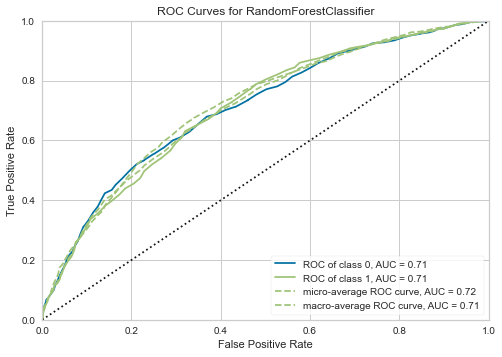

In [38]:
plot_model(rf)